# Mawrth_Vallis

In this series of note(book)s we are going to review the library using Mars Mawrth Vallis (https://en.wikipedia.org/wiki/Mawrth_Vallis) as instrument-data.

Mawrth Vallis (_MMV_ hereafter) is centered at (approx) 22.5<sup>o</sup>,343.5<sup>o</sup> (lat,lon; C180+E).
Let's define the region of interest as a box of **2** degrees sides around those coordinates:

In [1]:
bbox = {
    'minlat': 21.5,
    'maxlat': 23.5,
    'westlon': 342.5-360,
    'eastlon': 344.5-360
}

## Data query

The we are eventually going to download comes from USGS/PDS; to know where the data is available for download (ie, URL),
we query USGS' ODE (https://ode.rsl.wustl.edu/) servers.
All those quirks -- query, retrieve, select, etc. -- are implemented in the lib.

First thing we do is to query what are the datasets the (NPT) lib supports; And then we go query for them products.

In [2]:
import npt

npt.datasets.list()

['mars/mex/hrsc/rdrv3',
 'mars/mex/hrsc/refdr3',
 'mars/mro/ctx/edr',
 'mars/mro/hirise/rdrv11']

### CTX

In [3]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='intersect')

75 products found


In [4]:
query_results_ctx.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
49,J19_052142_2023_XN_22N017W,MRO,CTX,EDR,MARS,False,6.19,22.0786,342.5094,342.84,...,54.94,59.09,2017-09-10T10:25:19.300,2018-01-31T22:21:45.000,2017-09-10T10:25:12.574,2017-09-10T10:25:26.026,"POLYGON ((-17.26000 22.47010, -17.16000 21.756...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
74,N18_069274_2034_XN_23N017W,MRO,CTX,EDR,MARS,False,5.64,23.1546,342.2294,342.53,...,45.45,41.74,2021-05-07T04:23:09.851,2021-10-07T21:08:03.000,2021-05-07T04:23:03.125,2021-05-07T04:23:16.578,"POLYGON ((-17.56000 23.54130, -17.47000 22.827...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
21,G13_023422_2006_XN_20N017W,MRO,CTX,EDR,MARS,False,5.64,20.4926,342.3944,342.84,...,41.44,334.5,2011-07-26T13:38:19.911,2012-01-11T21:30:03.000,2011-07-26T13:37:50.123,2011-07-26T13:38:49.699,"POLYGON ((-17.55000 22.10320, -17.16000 18.941...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
45,J15_050797_2021_XN_22N017W,MRO,CTX,EDR,MARS,False,5.88,21.9546,342.8741,343.22,...,47.41,11.36,2017-05-28T15:08:55.171,2017-10-10T18:02:17.000,2017-05-28T15:08:42.679,2017-05-28T15:09:07.663,"POLYGON ((-16.95000 22.64860, -16.78000 21.329...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None
61,K10_057140_2020_XN_22N017W,MRO,CTX,EDR,MARS,False,5.64,21.8356,342.2994,342.6,...,58.23,262.78,2018-10-04T20:36:10.629,2019-02-15T18:52:56.000,2018-10-04T20:36:03.903,2018-10-04T20:36:17.356,"POLYGON ((-17.49000 22.22220, -17.40000 21.508...",https://pds-imaging.jpl.nasa.gov/data/mro/mars...,None,None


### HiRISE

In [5]:
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='intersect')

43 products found


In [6]:
query_results_hirise.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
34,ESP_056797_2020_RED,MRO,HIRISE,RDRV11,MARS,False,0.5,21.5595,344.208,344.28,...,62.38247,245.831626,2018-09-08T03:17:37.166,2018-09-13T06:20:34.000,2018-09-08T03:17:33.324,2018-09-08T03:17:41.009,"POLYGON ((-15.72000 21.36240, -15.81200 21.352...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
1,PSP_002641_2025_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,22.2517,342.551,342.621,...,58.835998,185.953173,2007-02-18T05:51:20.181,2009-11-11T10:51:58.000,2007-02-18T05:51:17.450,2007-02-18T05:51:22.912,"POLYGON ((-17.37900 22.11410, -17.48200 22.102...",https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
7,PSP_010183_2035_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,23.2361,342.5061,342.58,...,57.855067,133.563018,2008-09-27T23:17:44.397,2010-06-20T09:36:02.000,2008-09-27T23:17:41.617,2008-09-27T23:17:47.178,"POLYGON ((-17.42000 23.09660, -17.52800 23.084...",https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/PSP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
33,ESP_055399_2020_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,21.7513,342.475,342.537,...,54.388705,179.783087,2018-05-22T05:28:36.254,2018-05-31T04:11:19.000,2018-05-22T05:28:33.981,2018-05-22T05:28:38.527,"POLYGON ((-17.46300 21.63730, -17.55600 21.627...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...
25,ESP_050797_2020_RED,MRO,HIRISE,RDRV11,MARS,False,0.25,22.0389,342.8546,342.922,...,47.389051,11.352587,2017-05-28T15:08:56.661,2017-06-01T05:45:35.000,2017-05-28T15:08:54.106,2017-05-28T15:08:59.216,"POLYGON ((-17.07800 21.91070, -17.17500 21.899...",https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/RDR/ESP/ORB...,https://hirise.lpl.arizona.edu/PDS/EXTRAS/RDR/...


### HRSC

In [7]:
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='intersect')

12 products found


In [8]:
query_results_hrsc.sample(5)

,id,mission,inst,type,Target_name,Footprints_cross_meridian,Map_scale,Center_latitude,Center_longitude,Easternmost_longitude,...,Phase_angle,Solar_longitude,Observation_time,Product_creation_time,UTC_start_time,UTC_stop_time,geometry,image_url,label_url,browse_url
6,H5163_0009_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,22.8284,343.7694,344.46,...,None,None,2008-01-09T00:02:36.320,2016-04-27T02:54:28.000,2008-01-09T00:01:44.321,2008-01-09T00:03:28.319,"POLYGON ((-17.02000 19.48000, -15.54000 19.480...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
10,HC423_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,25,28.569,343.1755,344.942,...,None,None,2013-10-10T06:47:18.351,2016-10-28T15:11:46.000,2013-10-10T06:45:02.353,2013-10-10T06:49:34.350,"POLYGON ((-17.45700 20.75900, -17.46700 21.027...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
2,H2229_0001_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,25,19.4905,341.7115,344.19,...,None,None,2005-10-08T21:12:22.102,2016-03-14T22:12:55.000,2005-10-08T21:09:40.594,2005-10-08T21:15:03.611,"POLYGON ((-19.07600 11.60600, -19.08500 11.771...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
4,H3308_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,20.942,344.3251,345.112,...,None,None,2006-08-06T22:47:48.110,2016-04-18T15:52:52.000,2006-08-06T22:46:03.614,2006-08-06T22:49:32.606,"POLYGON ((-15.03900 27.39500, -15.03700 27.271...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...
11,HD633_0000_ND3.JP2,MEX,HRSC,REFDR3,MARS,False,12.5,22.0139,342.3976,343.173,...,None,None,2014-09-27T15:01:26.580,2016-10-29T11:58:31.000,2014-09-27T15:00:48.093,2014-09-27T15:02:05.067,"POLYGON ((-18.40500 19.56300, -16.82700 19.563...",https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...,https://pds-geosciences.wustl.edu/mex/mex-m-hr...


## Visualize footprints

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [40, 20]

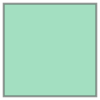

In [10]:
import shapely

bbox_polygon = shapely.geometry.box(
    bbox['westlon'], 
    bbox['minlat'], 
    bbox['eastlon'], 
    bbox['maxlat']
)

bbox_polygon

In [11]:
from pandas import concat
from geopandas import GeoDataFrame

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

In [12]:
def plot_geometries(gdf, ref_polygon=None, ref_label='Ref-Polygon'):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()

    polygon_lgd = None
    if ref_polygon:
        polygon_plt = ax.plot(*ref_polygon.exterior.xy, c='yellow')
        polygon_lgd = plt.legend(polygon_plt, [ref_label], loc=2)

    gdf.plot(alpha=0.5, edgecolor='red', column='inst',
             legend=True, legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
             figsize=(24,16), ax=ax)

    if polygon_lgd:
        ax.add_artist(polygon_lgd)
        
    return ax

<AxesSubplot:>

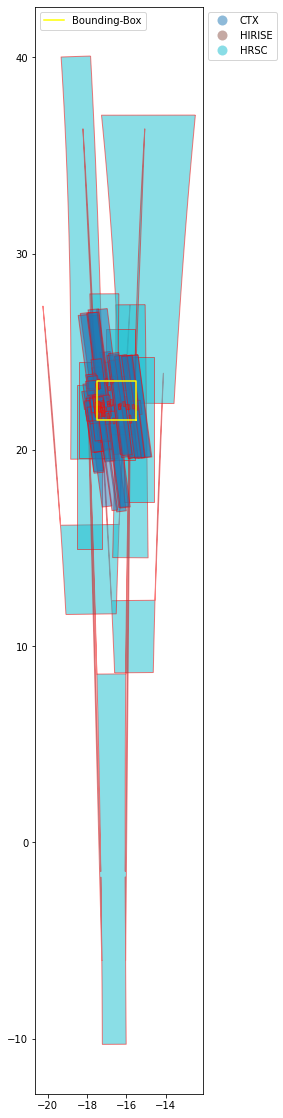

In [13]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [14]:
gdf.to_file('Mawrth_Vallis_ODE_products_intersect.geojson', driver='GeoJSON', index=False)

## Conclusion

We went through the selection of Mars image products -- more specifically, their footprints -- as provided by USGS/PDS/ODE' database. The whole of querying, filtering, selection, and metadata formating is implemented in NPT' `search` module.

Keypoints in the process (implemented in the internals of the library) are:

- ODE search interface understands geographical longitude coordinates in the range [0:360]. Accordingly, results (lon) coordinates are also in the same (0:360) range;
- Some footprints returned by ODE are of (shapely) formats *different from Polygon*: *GeometryCollection* or *MultiPolygon*. The reason is unknown to me, most probably some bug/lack of data validation in their pipeline.
  * NPT fixes that by "casting" those (wrong) geometries to their _envelope Polygon_;
- As in the example data here downloaded, some geometries do not properly represent the respective image (as you can see in the plot above): polygon is partially "empty". NPT does *not* fix those issues.

See the appendix section below for a summary of this notebook on retrieving on footprints *inside* the bounding-box.

## Appendix

### Selection of fully contained image products/footprints

In [15]:
query_results_ctx = npt.search.ode(dataset='mars/mro/ctx/edr', bbox=bbox, match='contain')
query_results_hirise = npt.search.ode(dataset='mars/mro/hirise/rdrv11', bbox=bbox, match='contain')
query_results_hrsc = npt.search.ode(dataset='mars/mex/hrsc/refdr3', bbox=bbox, match='contain')

gdf = GeoDataFrame(concat([
        query_results_hrsc,
        query_results_ctx,
        query_results_hirise,
    ],ignore_index=True))

3 products found
26 products found
0 products found


<AxesSubplot:>

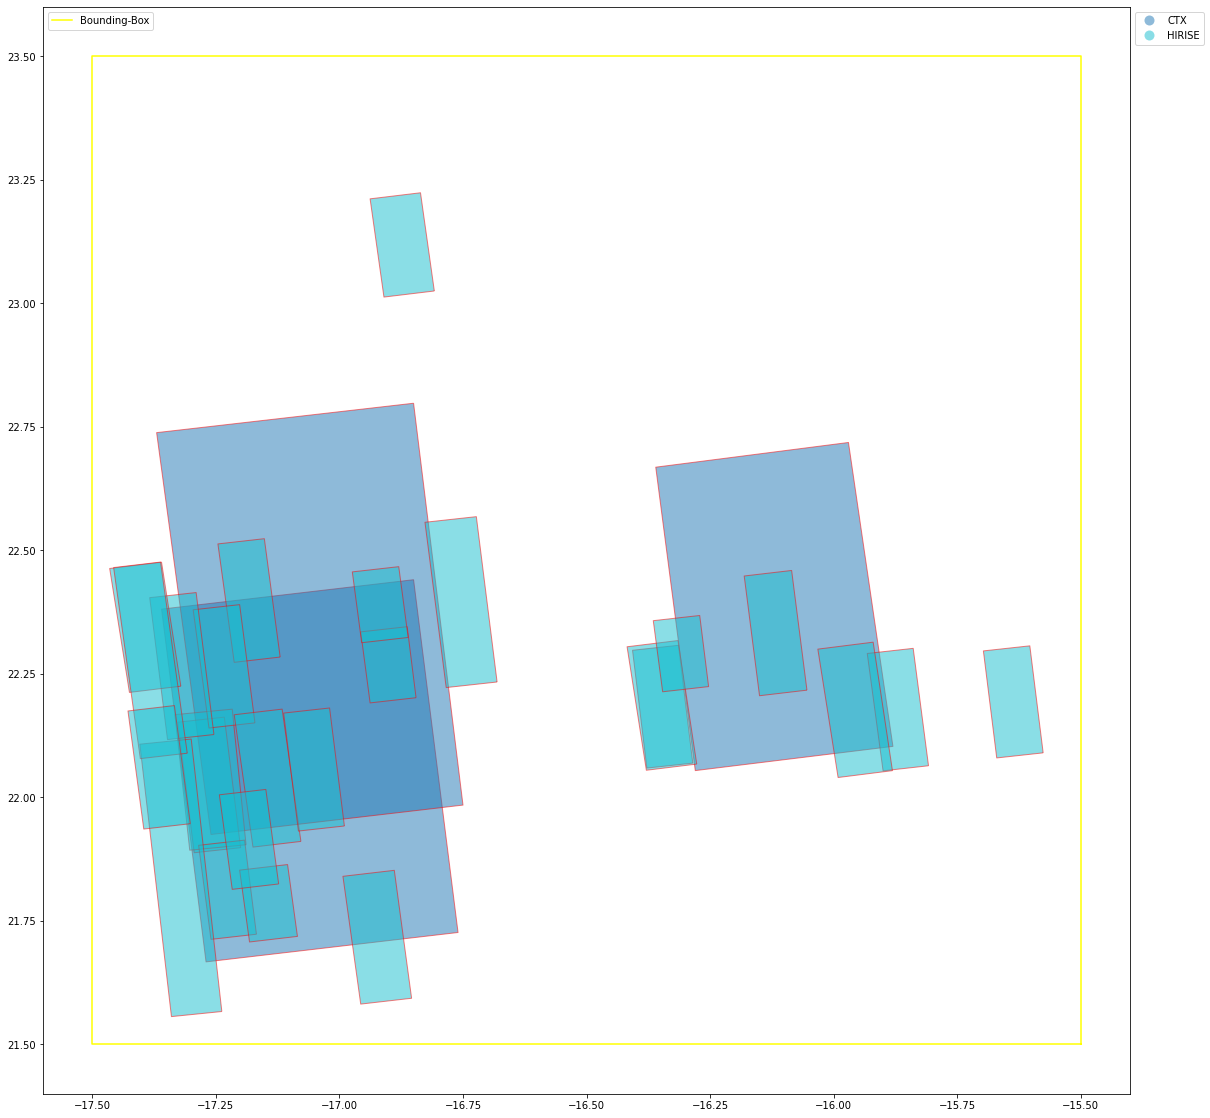

In [16]:
plot_geometries(gdf, bbox_polygon, 'Bounding-Box')

In [17]:
gdf.to_file('Mawrth_Vallis_ODE_products_contain.geojson', driver='GeoJSON', index=False)